<b>Student Name</b>: Uğur Ali Kaplan<br/>
<b>Student No:</b>: 150170042

There is a problem with dlib installation in my operating system, therefore I was unable to use GUI features. Instead of dlib's GUI elements, I have used matplotlib throughout the assignment.

In [1]:
import numpy as np
import os
import dlib
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
import moviepy.editor as mpy

In [2]:
data_path = os.path.join(os.curdir, "images")
predictor_path = os.path.join(os.curdir, "shape_predictor_68_face_landmarks.dat")

<h2>Question 1</h2>

Number of rectangles for image 1: 1
Number of rectangles for image 2: 1
Number of rectangles for image 3: 1


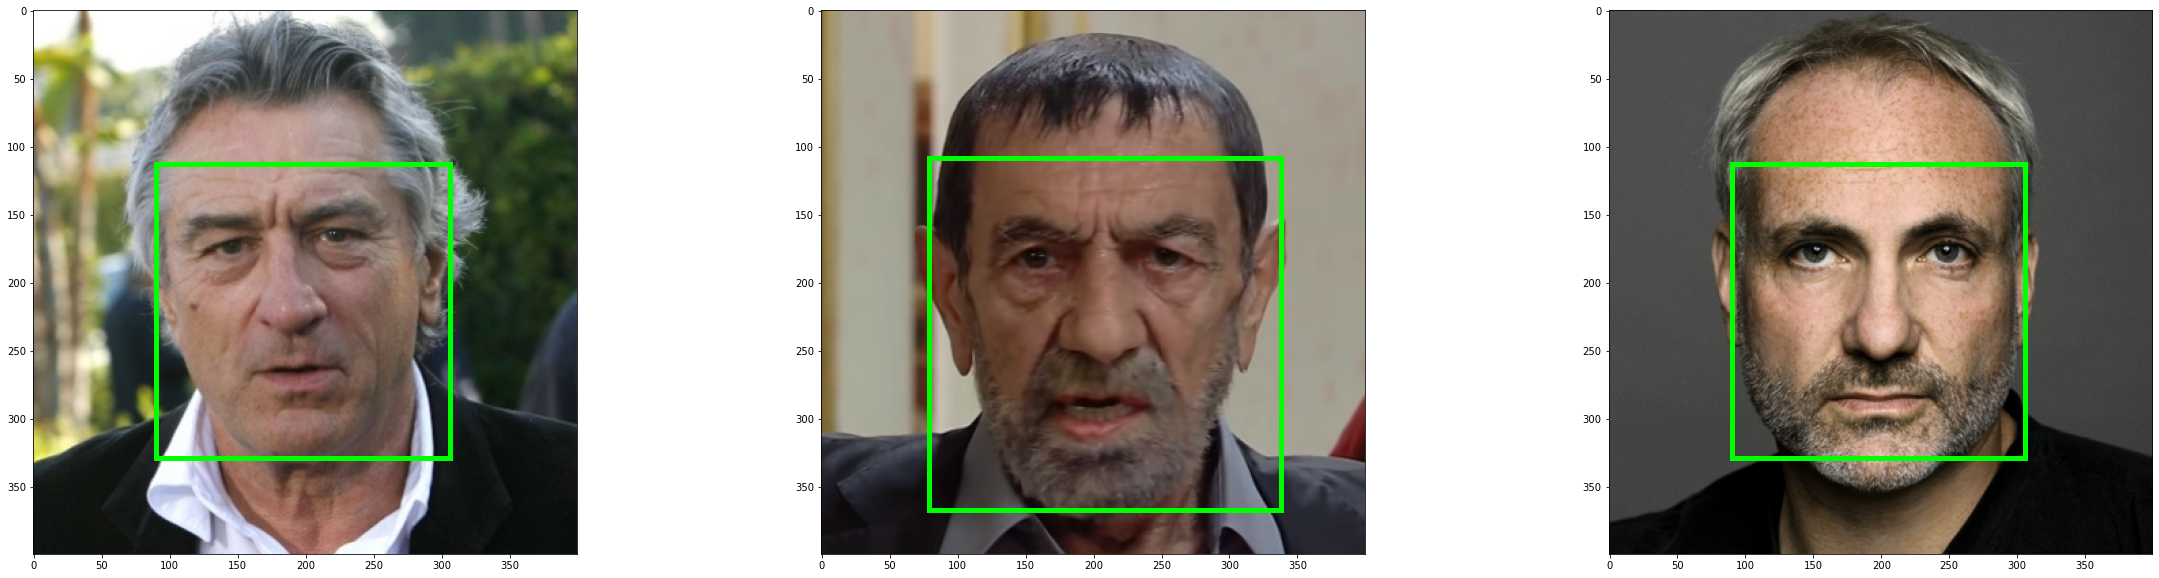

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

images = ["deniro.jpg", "aydemirakbas.png", "kimbodnia.png"]
fig, ax = plt.subplots(1, 3, figsize = (40,10))

for i in range(3):
    image = cv2.imread(os.path.join(data_path, images[i]))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rectangles = detector(gray)
    print(f"Number of rectangles for image {i + 1}: {len(rectangles)}")

    ax[i].imshow(image[:,:,[2, 1, 0]])
    tl = rectangles[0].tl_corner()
    rect = patches.Rectangle((tl.x, tl.y),
                             rectangles[0].width(),
                             rectangles[0].height(),
                             linewidth=5, edgecolor='lime',facecolor='none')
    ax[i].add_patch(rect)

plt.show()

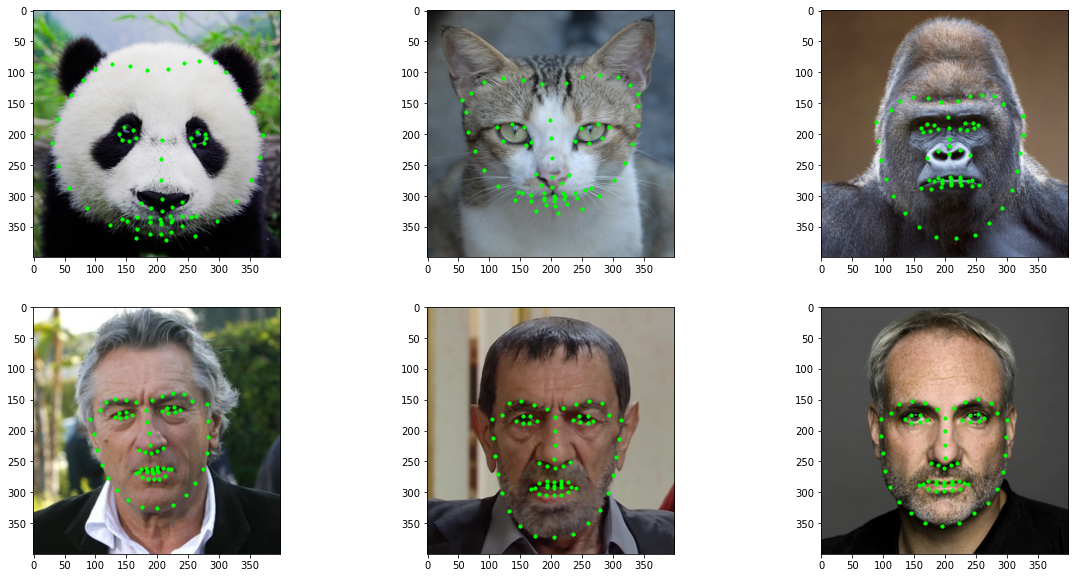

In [4]:
human_images = ["deniro.jpg", "aydemirakbas.png", "kimbodnia.png"]
animal_images = ["panda.jpg", "cat.jpg", "gorilla.jpg"]
animal_data = [np.load(os.path.join(data_path, "panda_landmarks.npy")),
              np.load(os.path.join(data_path, "cat_landmarks.npy")),
              np.load(os.path.join(data_path, "gorilla_landmarks.npy"))]

fig, ax = plt.subplots(2, 3, figsize = (20, 10))

human_landmarks_x = []
human_landmarks_y = []

animal_landmarks_x = []
animal_landmarks_y = []

for i in range(3):
    image = cv2.imread(os.path.join(data_path, animal_images[i]))
    points_x = [animal_data[i][k, 0] for k in range(68)]
    points_y = [animal_data[i][k, 1] for k in range(68)]
    animal_landmarks_x.append(points_x)
    animal_landmarks_y.append(points_y)
    ax[0, i].imshow(image[:,:,[2, 1, 0]])
    ax[0, i].scatter([points_x], [points_y], s=10, color="lime")

for i in range(3):
    image = cv2.imread(os.path.join(data_path, human_images[i]))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rectangles = detector(gray)
    points = predictor(gray, rectangles[0])
    points_x = [points.part(k).x for k in range(68)]
    points_y = [points.part(k).y for k in range(68)]
    human_landmarks_x.append(points_x)
    human_landmarks_y.append(points_y)
    ax[1, i].imshow(image[:,:,[2, 1, 0]])
    ax[1, i].scatter([points_x], [points_y], s=10, color="lime")

plt.show()

<h2>Question 2</h2>

I will morph 3 images into each other.

1. De Niro $\implies$ Kimbodnia
2. Aydemir Akbas $\implies$ Gorilla
3. Panda $\implies$ Cat

I need to triangulate De Niro, Aydemir Akbas, and Panda and use the ID correspondences to triangulate Kimbodnia, Gorilla, and Cat.

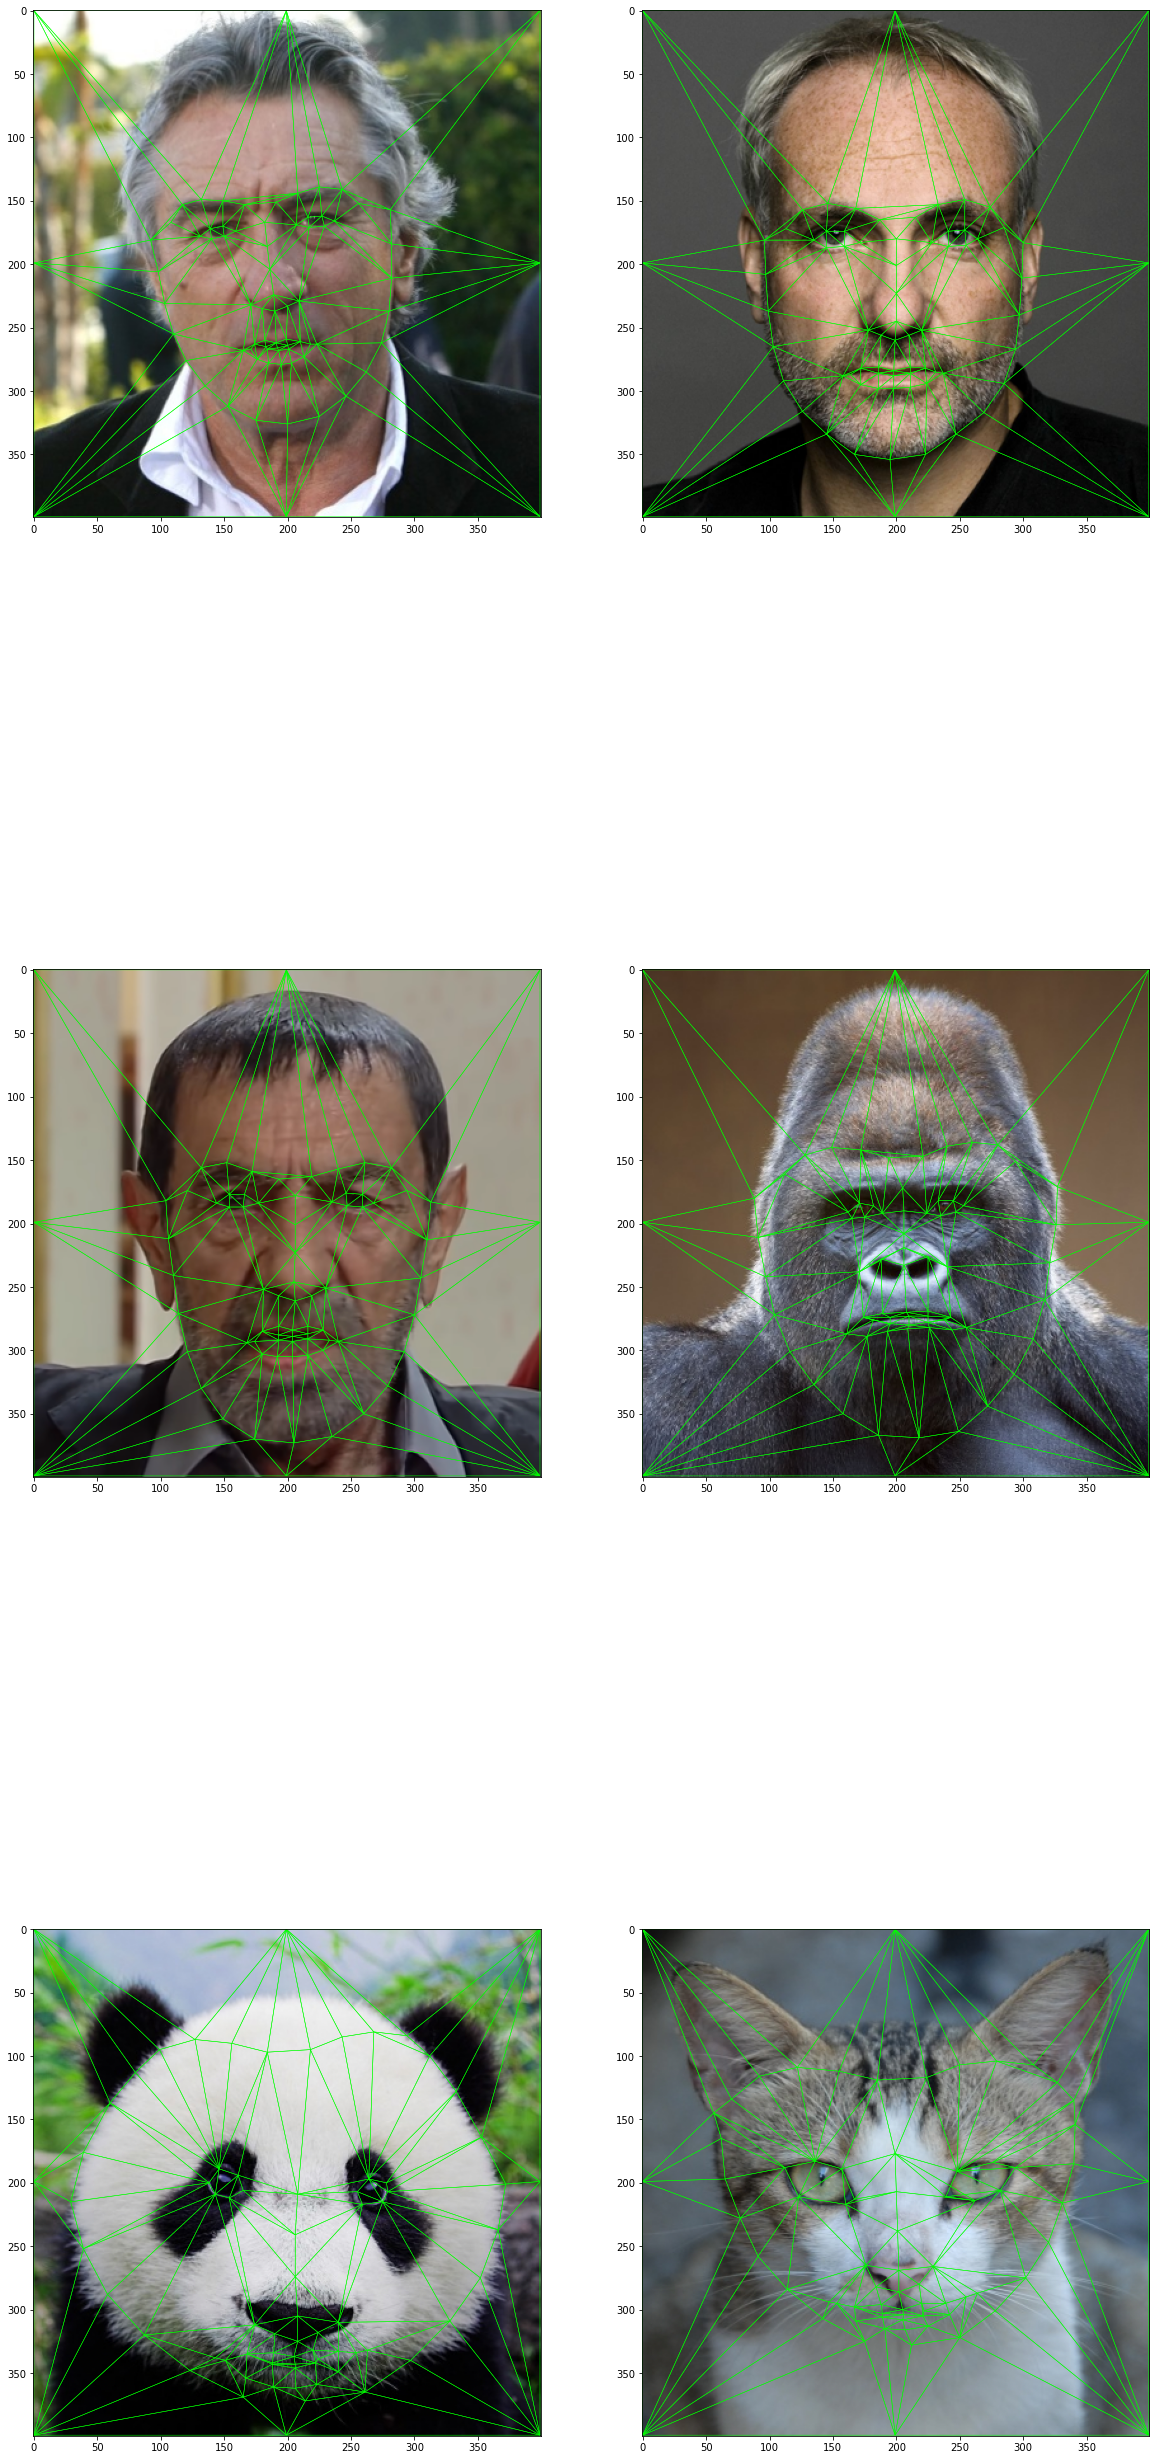

In [5]:
pairings = [("deniro.jpg", "kimbodnia.png", 0, 2),
           ("aydemirakbas.png", "gorilla.jpg", 1, 5),
           ("panda.jpg", "cat.jpg", 3, 4)]

morph_pairs = list()

landmarks_x = human_landmarks_x + animal_landmarks_x
landmarks_y = human_landmarks_y + animal_landmarks_y

fig, ax = plt.subplots(3, 2, figsize = (20,50))

for i in range(3):
    src_image = cv2.imread(os.path.join(data_path, pairings[i][0]))
    subdiv = cv2.Subdiv2D((0, 0, src_image.shape[0], src_image.shape[1]))
    landmark_points = list()

    for j in range(68):
        subdiv.insert((landmarks_x[pairings[i][2]][j], landmarks_y[pairings[i][2]][j]))
        landmark_points.append([landmarks_x[pairings[i][2]][j], landmarks_y[pairings[i][2]][j]])

    subdiv.insert((0,0))
    subdiv.insert((0, src_image.shape[1] - 1))
    subdiv.insert((src_image.shape[0] - 1, 0))
    subdiv.insert((src_image.shape[0] - 1, src_image.shape[1] - 1))
    subdiv.insert((0, (src_image.shape[1] - 1)//2))
    subdiv.insert((src_image.shape[0] - 1, (src_image.shape[1] - 1)//2))
    subdiv.insert(((src_image.shape[0] - 1)//2, 0))
    subdiv.insert(((src_image.shape[0] - 1)//2, src_image.shape[1] - 1))

    landmark_points.append([0,0])
    landmark_points.append([0, src_image.shape[1] - 1])
    landmark_points.append([src_image.shape[0] - 1, 0])
    landmark_points.append([src_image.shape[0] - 1, src_image.shape[1] - 1])
    landmark_points.append([0, (src_image.shape[1] - 1)//2])
    landmark_points.append([src_image.shape[0] - 1, (src_image.shape[1] - 1)//2])
    landmark_points.append([(src_image.shape[0] - 1)//2, 0])
    landmark_points.append([(src_image.shape[0] - 1)//2, src_image.shape[1] - 1])

    img1_triangles = subdiv.getTriangleList()
    

    a = subdiv.getTriangleList().reshape(-1, 3, 2)
    
    ax[i, 0].imshow(src_image[:,:,[2,1,0]])
    for j in range(a.shape[0]):
        polygon = patches.Polygon(a[j], fill=False, closed=True, edgecolor="lime", linewidth=0.5)
        ax[i, 0].add_patch(polygon)
    
    tar_image = cv2.imread(os.path.join(data_path, pairings[i][1]))
    trig_pts = list()
    
    for j in range(a.shape[0]):
        pt1, pt2, pt3 = a[j, 0, :].astype(np.uint64).tolist(), a[j, 1, :].astype(np.uint64).tolist(), a[j, 2, :].astype(np.uint64).tolist()
        trig_pts.append([landmark_points.index(pt1), landmark_points.index(pt2), landmark_points.index(pt3)])

    tar_landmark_points = [[landmarks_x[pairings[i][3]][j], landmarks_y[pairings[i][3]][j]] for j in range(len(landmarks_x[i]))]
    tar_landmark_points.append([0,0])
    tar_landmark_points.append([0, src_image.shape[1] - 1])
    tar_landmark_points.append([src_image.shape[0] - 1, 0])
    tar_landmark_points.append([src_image.shape[0] - 1, src_image.shape[1] - 1])
    tar_landmark_points.append([0, (src_image.shape[1] - 1)//2])
    tar_landmark_points.append([src_image.shape[0] - 1, (src_image.shape[1] - 1)//2])
    tar_landmark_points.append([(src_image.shape[0] - 1)//2, 0])
    tar_landmark_points.append([(src_image.shape[0] - 1)//2, src_image.shape[1] - 1])

    img2_triangles = list()

    for j in range(a.shape[0]):
        co1, co2, co3 = tar_landmark_points[trig_pts[j][0]], tar_landmark_points[trig_pts[j][1]], tar_landmark_points[trig_pts[j][2]]
        img2_triangles.append([co1, co2, co3])

    img2_triangles = np.array(img2_triangles)
    
    ax[i, 1].imshow(tar_image[:,:,[2,1,0]])
    for j in range(img2_triangles.shape[0]):
        polygon = patches.Polygon(img2_triangles[j], fill=False, closed=True, edgecolor="lime", linewidth=0.5)
        ax[i, 1].add_patch(polygon)
        
    morph_pairs.append([img1_triangles, img2_triangles.reshape(-1, 6), src_image, tar_image])

plt.show()

<h2>Question 3</h2>

Triangles and images are stored in `morph_pairs` list.

In [6]:
def make_homogeneous(triangle):
    triangle = triangle.reshape(6) # Otherwise it does not change
    homogeneous = np.array([triangle[::2], triangle[1::2], [1, 1, 1]]) # We create matrices for use in transformation
    # in the form of [[X1, X2, X3], [Y1, Y2, Y3], [1, 1, 1]]
    return homogeneous

In [7]:
def calc_transform(triangle1, triangle2):
    source = make_homogeneous(triangle1).T
    target = triangle2.reshape(6)
    
    Mtx = np.array([
        np.concatenate((source[0], np.zeros(3))),
        np.concatenate((np.zeros(3), source[0])),
        np.concatenate((source[1], np.zeros(3))),
        np.concatenate((np.zeros(3), source[1])),
        np.concatenate((source[2], np.zeros(3))),
        np.concatenate((np.zeros(3), source[2])),
                   ]) # Create the M matrix for Affine Transformation Estimation
    # [[X1, Y1, 1, 0, 0, 0],
    #  [0, 0, 0, X1, Y1, 1],
    #  [X2, Y2, 1, 0, 0, 0],
    #  [0, 0, 0, X2, Y2, 1],
    #  [X3, Y3, 1, 0, 0, 0],
    #  [0, 0, 0, X3, Y3, 1]]
    
    
    coefs = np.matmul(np.linalg.pinv(Mtx), target) # Ma = b -> M^{-}Ma = M^{-}b -> We have found the transformatino coefficients
    
    Transform = np.array([coefs[:3], coefs[3:], [0, 0, 1]]) # Reshape the coefficients matrix
    # Now first row is only for the transformation of x coordinates
    # Second row is only for the transformation of y coordinates
    # Third row is not used, it repeats the third row of the matrix to its right
    
    return Transform

In [8]:
def vectorised_Bilinear(coordinates, target_img, size):
    # c[0] -> x
    # c[1] -> y
    coordinates[0] = np.clip(coordinates[0], 0, size[0] - 1) # Points will lie between the range of the coordinate system
    coordinates[1] = np.clip(coordinates[1], 0, size[1] - 1)
    lower = np.floor(coordinates).astype(np.uint32) # Points rounded down
    upper = np.ceil(coordinates).astype(np.uint32) # Points rounded up
    
    error = coordinates - lower # Difference between coordinates and the rounded down coordinates (different for each point)
    resindual = 1 - error # Difference between coordinates and the rounded up coordinates
    
    # We find the pixel intensities in the image, and give a weight to found intensities depending on the error rate
    top_left = np.multiply(np.multiply(resindual[0], resindual[1]).reshape(coordinates.shape[1], 1), target_img[lower[0], lower[1], :])
    top_right = np.multiply(np.multiply(resindual[0], error[1]).reshape(coordinates.shape[1], 1), target_img[lower[0], upper[1], :])
    bot_left = np.multiply(np.multiply(error[0], resindual[1]).reshape(coordinates.shape[1], 1), target_img[upper[0], lower[1], :])
    bot_right = np.multiply(np.multiply(error[0], error[1]).reshape(coordinates.shape[1], 1), target_img[upper[0], upper[1], :])
    
    return np.uint8(np.round(top_left + top_right + bot_left + bot_right)) # We add the weighted intensities to find the color

In [9]:
def image_morph(image1, image2, triangles1, triangles2, transforms, t):
    
    inter_image_1 = np.zeros(image1.shape).astype(np.uint8)
    inter_image_2 = np.zeros(image2.shape).astype(np.uint8)
    
    for i in range(len(transforms)):
        homo_inter_tri = (1-t)*make_homogeneous(triangles1[i]) + t*make_homogeneous(triangles2[i]) # We are calculating a middle point between the vertices in source and target triangle depending on the value of t
        
        polygon_mask = np.zeros(image1.shape[:2], dtype=np.uint8) # Zeros matrix in the shape of the image (height, width)
        cv2.fillPoly(polygon_mask, [np.int32(np.round(homo_inter_tri[1::-1, :].T))], color=255) # # Inside of the triangle in the polygon_mask is colored black
        seg = np.where(polygon_mask == 255) # Points in which mask is colored black (seg[0] -> x coordinates, seg[1] -> y coordinates)
        mask_points = np.vstack((seg[0], seg[1], np.ones(len(seg[0]))))
        # We have created a matrix in the form of
        # X X X X X ...
        # Y Y Y Y Y ...
        # 1 1 1 1 1 ...
        # and it has the coordinates of the points we want to morph for the current triangle
        # (coordinates of the pixels in the region bound by the triangle)
        
        inter_tri = homo_inter_tri[:2].flatten(order="F") # Intermediate points (pixel location in the morphed image)
        # In the format of [[X1, Y1, X2, Y2, X3, Y3]]
        
        inter_to_img1 = calc_transform(inter_tri, triangles1[i]) # Calculate transformation from intermediate points to the points in the image 1 
        inter_to_img2 = calc_transform(inter_tri, triangles2[i]) # Calculate transformation from intermediate points to the points in the image 2
        
        mapped_to_img1 = np.matmul(inter_to_img1, mask_points)[:-1] # Transform the mask points using the intermediate->image map
        mapped_to_img2 = np.matmul(inter_to_img2, mask_points)[:-1] # Transform the mask points using the intermediate->image map
        
        # We find the pixel intensities in the intermediate image
        # depending on the current transformation and the error rates
        inter_image_1[seg[0], seg[1], :] = vectorised_Bilinear(mapped_to_img1, image1, inter_image_1.shape) 
        inter_image_2[seg[0], seg[1], :] = vectorised_Bilinear(mapped_to_img2, image2, inter_image_2.shape)
        
    result = (1-t)*inter_image_1 + t*inter_image_2 # Combine the intermediate images with weights depending on the timestep
        
    return result.astype(np.uint8)   

In [10]:
sequences = []

for it in range(3):
    img1_triangles, img2_triangles, src_image, tar_image = morph_pairs[it]
    img1_triangles = img1_triangles[:, [1, 0, 3, 2, 5, 4]]
    img2_triangles = img2_triangles[:, [1, 0, 3, 2, 5, 4]]

    Transforms = np.zeros((len(img1_triangles), 3, 3))

    for i in range(Transforms.shape[0]):
        source = img1_triangles[i].reshape(6)
        target = img2_triangles[i].reshape(6)
        Transforms[i] = calc_transform(source, target) # We will transform triangles corresponding to same regions (We have changed the feature landmarks of the second image without creating a new one after all)
        # Here, each element of the Transforms is a coefficient matrix that can be multiplied with the points in the source triangle
        # So, we will be multiplying the outputs of the make_homogeneous with coefficients we have here

    morphs = []
    for t in np.arange(0, 1.0001, 0.02): # # We have to calculate multiple frames for a smooth transition, each t represents a timestep in the transition
        print("Processing:\t", t*100, "%")
        morphs.append(image_morph(src_image, tar_image, img1_triangles, img2_triangles, Transforms, t)[:, :, ::-1])
        
    sequences.append(morphs)

Processing:	 0.0 %
Processing:	 2.0 %
Processing:	 4.0 %
Processing:	 6.0 %
Processing:	 8.0 %
Processing:	 10.0 %
Processing:	 12.0 %
Processing:	 14.000000000000002 %
Processing:	 16.0 %
Processing:	 18.0 %
Processing:	 20.0 %
Processing:	 22.0 %
Processing:	 24.0 %
Processing:	 26.0 %
Processing:	 28.000000000000004 %
Processing:	 30.0 %
Processing:	 32.0 %
Processing:	 34.0 %
Processing:	 36.0 %
Processing:	 38.0 %
Processing:	 40.0 %
Processing:	 42.0 %
Processing:	 44.0 %
Processing:	 46.0 %
Processing:	 48.0 %
Processing:	 50.0 %
Processing:	 52.0 %
Processing:	 54.0 %
Processing:	 56.00000000000001 %
Processing:	 57.99999999999999 %
Processing:	 60.0 %
Processing:	 62.0 %
Processing:	 64.0 %
Processing:	 66.0 %
Processing:	 68.0 %
Processing:	 70.0 %
Processing:	 72.0 %
Processing:	 74.0 %
Processing:	 76.0 %
Processing:	 78.0 %
Processing:	 80.0 %
Processing:	 82.0 %
Processing:	 84.0 %
Processing:	 86.0 %
Processing:	 88.0 %
Processing:	 90.0 %
Processing:	 92.0 %
Processing:

In [11]:
for it in range(3):
    clip = mpy.ImageSequenceClip(sequences[it], fps=25)
    clip.write_videofile("video_" + str(it) + ".mp4", codec="libx264")

t:   6%|▌         | 3/52 [00:00<00:01, 25.86it/s, now=None]

Moviepy - Building video video_0.mp4.
Moviepy - Writing video video_0.mp4



t:  12%|█▏        | 6/52 [00:00<00:00, 52.80it/s, now=None] 

Moviepy - Done !
Moviepy - video ready video_0.mp4
Moviepy - Building video video_1.mp4.
Moviepy - Writing video video_1.mp4



t:  25%|██▌       | 13/52 [00:00<00:00, 120.44it/s, now=None]

Moviepy - Done !
Moviepy - video ready video_1.mp4
Moviepy - Building video video_2.mp4.
Moviepy - Writing video video_2.mp4



Moviepy - Done !
Moviepy - video ready video_2.mp4
